
# CNN convolutional Neural Netwrok 
### Image Recognition Problem 

### GW MSBA Summer Machine Learning Course Final Project 

By Di Niu, Yi Yang


In this competition, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. In other words, the goal in this competition is to take an image of a handwritten single digit, and determine what that digit is. For every ImageId in the test set, I am expected to predict the correct label.

Came across the kernels that are posted on Kaggle, I happen to notice that convolutional Neural Network (CNN) is a useful neural network to solve MNIST.  The package used for CNN is called Keras in Python. Keras is a Python library for deep learning that wraps the efficient numerical libraries Theano and TensorFlow.

References:
https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99


http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/



# Import necessary packages and load the kaggle data

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [4]:
train_file = "/Users/diniu/Desktop/Machine learning/Dtrain.csv"
test_file = "/Users/diniu/Desktop/Machine learning/Dtest.csv"
output_file = "submission.csv"

In [5]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

For the 28×28 pixel images we've been using, this means our network has 784(=28×28) input neurons. In other words, each data point is consist of 784 values. 

The below, two graph comparasion is inspired by XXXX, he wrote a code that clearly present why CNN giving a better results. This visualization shows the difference. CNN has 784 input neurons. 



We then trained the network's weights and biases so that the network's output would correctly identify the input image: '0', '1', '2', ..., '8', or '9'.

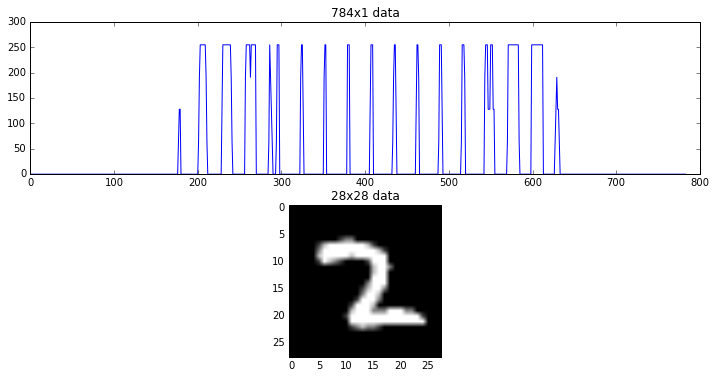

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In Keras the Convolution layer requirest an additional dimension which will be used for the various filter.

When we have eg. 2D dataset the shape is (data_points, rows, cols).

Convolution2D requires shape (data_points, rows, cols, 1).

Otherwise it fails with eg. "Exception: Input 0 is incompatible with layer convolution2d_5: expected ndim=4, found ndim=3"

thus the below command is used to reshape

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [8]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

We then trained the network's weights and biases so that the network's output would correctly identify the input image: '0', '1', '2', ..., '8', or '9'.

In [9]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train[0])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


# Training

CNN uses a bunch of filters. A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal).


In [10]:
#Here is a mixture of the filters 
model = Sequential()
#RELU is just a non linearity which is applied similar to neural networks.

#Convolutional input layer, 16 feature maps with a size of 3×3 and a rectifier activation function.
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))

model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

#Max Pool layer with size 2×2.
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

# Dense(512) is a fully-connected layer with 512 hidden units.
# To reduce overfitting, we will apply dropout before the readout layer. 
# Fully connected output layer with 10 units and a softmax activation function.
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [11]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [13]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

## Here, the Neural Network parameters can be fixed to determine your best fit

Thus, we used steps_per_epoch=700, epochs=50, 

The parameter steps_per_epoch determines how many times the generator datagen.flow is called in one epoch. I have tried to tune the paramter in different combination, in order to further improve the accurancy.

The best parameters seems to be this combination where steps_per_epoch=700, epochs =50. In other words, in one epoch, the data is called 700 times. So in total, the training samples in an epoch is 700*16, which is 11200. And we have 50 epochs.


In [14]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=700,
                           epochs=50, 
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), 
                           callbacks=[annealer])

Epoch 1/50
43s - loss: 0.8324 - acc: 0.7301 - val_loss: 0.1789 - val_acc: 0.9475
Epoch 2/50
41s - loss: 0.3395 - acc: 0.8982 - val_loss: 0.0766 - val_acc: 0.9775
Epoch 3/50
41s - loss: 0.2591 - acc: 0.9249 - val_loss: 0.0574 - val_acc: 0.9825
Epoch 4/50
41s - loss: 0.2091 - acc: 0.9373 - val_loss: 0.0555 - val_acc: 0.9825
Epoch 5/50
41s - loss: 0.1777 - acc: 0.9460 - val_loss: 0.0508 - val_acc: 0.9850
Epoch 6/50
41s - loss: 0.1659 - acc: 0.9517 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 7/50
41s - loss: 0.1555 - acc: 0.9534 - val_loss: 0.0220 - val_acc: 0.9925
Epoch 8/50
42s - loss: 0.1401 - acc: 0.9604 - val_loss: 0.0228 - val_acc: 0.9925
Epoch 9/50
41s - loss: 0.1272 - acc: 0.9634 - val_loss: 0.0174 - val_acc: 0.9950
Epoch 10/50
41s - loss: 0.1207 - acc: 0.9665 - val_loss: 0.0160 - val_acc: 0.9925
Epoch 11/50
41s - loss: 0.1106 - acc: 0.9688 - val_loss: 0.0227 - val_acc: 0.9900
Epoch 12/50
41s - loss: 0.0947 - acc: 0.9722 - val_loss: 0.0156 - val_acc: 0.9925
Epoch 13/50
41s - loss: 0

# Other way to improve the model performance:

### 1. Train for More Epochs. 

### 2. Image Data Augmentation. 

### 3. Deeper Network Topology. 


# Evaluate the Model
Now try on the entire validation dataset

In [15]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0124, final accuracy: 0.9962


A visualization is made to show the test and training final loss and final accuracy. 

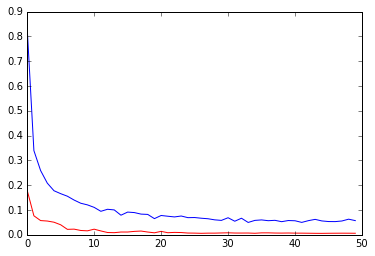

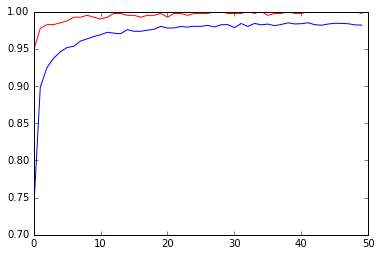

In [16]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [17]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[413   0   0   0   0   0   0   0   0   0]
 [  0 469   0   0   0   0   1   0   0   0]
 [  0   1 420   0   0   0   0   3   0   0]
 [  0   0   0 430   0   0   0   0   2   0]
 [  0   0   0   0 407   0   0   0   0   0]
 [  0   0   0   0   0 364   2   0   0   0]
 [  0   0   0   0   1   0 405   0   0   0]
 [  0   1   1   0   0   0   0 444   0   0]
 [  0   0   0   0   0   0   0   0 394   0]
 [  1   0   1   0   1   1   0   0   0 438]]


our final loss is 0.0124, final accuracy is 0.9962

# Output

In [18]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [19]:
y_hat = model.predict(x_test, batch_size=64)

In [20]:
y_pred = np.argmax(y_hat,axis=1)

In [21]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

## Reflection:

MNIST is where everyone in machine learning starts. This digital recognizer is a perfect introduction to techniques like neural networks. There are many techniques are recommended as I went through the discussion board, such as SVM, simple deep MLP, Deep neural network and CNN

We choose CNN because it is a effective tool to deal with MNIST problem. A convolutional neural network (CNN) aims to address this problem by using a more structured weight representation. Instead of flattening the image and doing a simple matrix-matrix multiplication, it employs one or more convolutional layers that each performs a 2-D convolution on the input image.

We really learnt a lot about CNN and dimension reduction (although it is not covered in this Python notebook.) after doing this contest.  We enjoyed the process of learning the code and improving the model performance. :)
